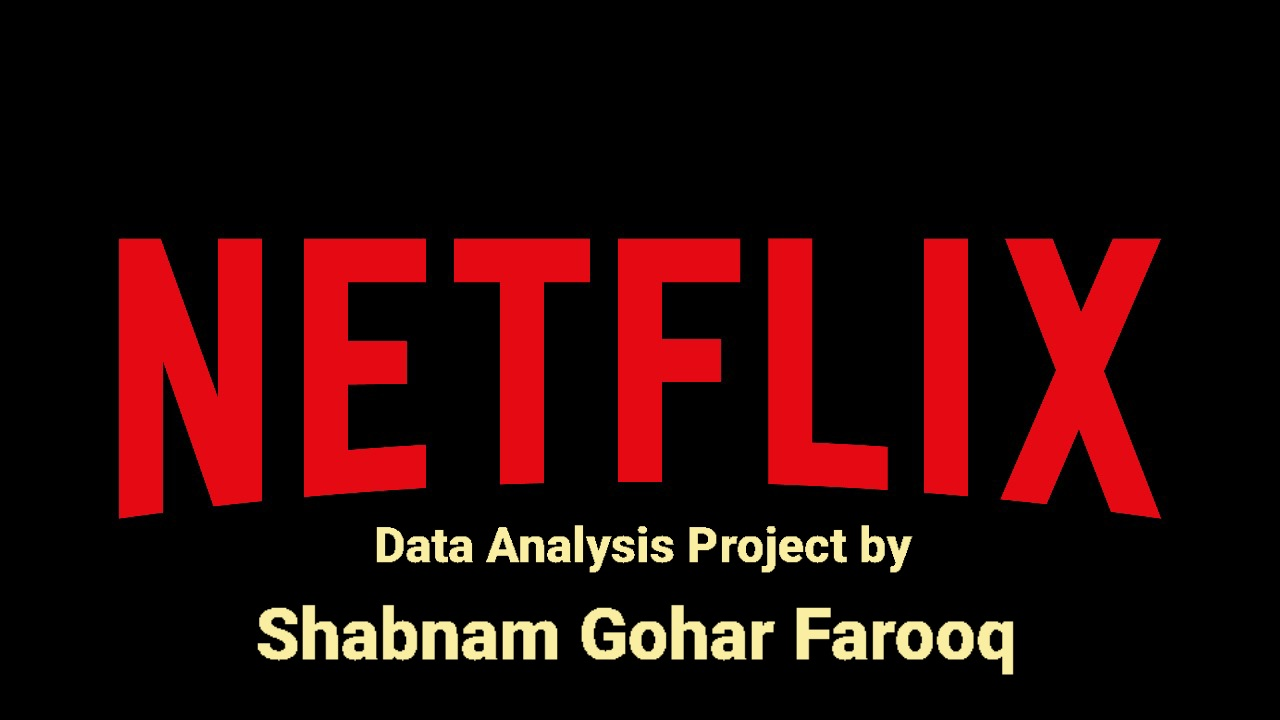

In [1]:
import pandas as pd
#visual installation libraries
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\HP\\Desktop\\netflix.csv")
df.head(20)

show_id     type                                              title  \
0       s1    Movie                               Dick Johnson Is Dead   
1       s2  TV Show                                      Blood & Water   
2       s3  TV Show                                          Ganglands   
3       s4  TV Show                              Jailbirds New Orleans   
4       s5  TV Show                                       Kota Factory   
5       s6  TV Show                                      Midnight Mass   
6       s7    Movie                   My Little Pony: A New Generation   
7       s8    Movie                                            Sankofa   
8       s9  TV Show                      The Great British Baking Show   
9      s10    Movie                                       The Starling   
10     s11  TV Show                Vendetta: Truth, Lies and The Mafia   
11     s12  TV Show                                   Bangkok Breaking   
12     s13    Movie                                       Je Suis Karl   
13     s14    Movie                   Confessions of an Invisible Girl   
14     s15  TV Show                    Crime Stories: India Detectives   
15     s16  TV Show                                  Dear White People   
16     s17    Movie  Europe's Most Dangerous Man: Otto Skorzeny in ...   
17     s18  TV Show                                    Falsa identidad   
18     s19    Movie                                          Intrusion   
19     s20  TV Show                                             Jaguar   

                                         director  \
0                                 Kirsten Johnson   
1                                             NaN   
2                                 Julien Leclercq   
3                                             NaN   
4                                             NaN   
5                                   Mike Flanagan   
6                   Robert Cullen, José Luis Ucha   
7                                    Haile Gerima   
8                                 Andy Devonshire   
9                                  Theodore Melfi   
10                                            NaN   
11                              Kongkiat Komesiri   
12                            Christian Schwochow   
13                                  Bruno Garotti   
14                                            NaN   
15                                            NaN   
16  Pedro de Echave García, Pablo Azorín Williams   
17                                            NaN   
18                                     Adam Salky   
19                                            NaN   

                                                 cast  \
0                                                 NaN   
1   Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
2   Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   
3                                                 NaN   
4   Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...   
5   Kate Siegel, Zach Gilford, Hamish Linklater, H...   
6   Vanessa Hudgens, Kimiko Glenn, James Marsden, ...   
7   Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
8   Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   
9   Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
10                                                NaN   
11  Sukollawat Kanarot, Sushar Manaying, Pavarit M...   
12  Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   
13  Klara Castanho, Lucca Picon, Júlia Gomes, Marc...   
14                                                NaN   
15  Logan Browning, Brandon P. Bell, DeRon Horton,...   
16                                                NaN   
17  Luis Ernesto Franco, Camila Sodi, Sergio Goyri...   
18  Freida Pinto, Logan Marshall-Green, Robert Joh...   
19  Blanca Suárez, Iván Marcos, Óscar Casas, Adriá...   

                                              country date_added  \
0                                       United States  25-Sep-21   


In [3]:
df.shape

(8807, 12)

In [4]:
df.isnull().sum() #checking for null values

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
import numpy as np
df["country"].replace(np.nan, "United States",inplace = True)

In [6]:
df.isnull().sum() #checking for null values again

show_id            0
type               0
title              0
director        2634
cast             825
country            0
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
df["director"].replace(np.nan, "No Director",inplace=True)
df["cast"].replace(np.nan, "No Cast",inplace=True)
df.isnull().sum() #checking for null values again

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [8]:
df.shape

(8807, 12)

In [9]:
df["rating"].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [10]:
df["listed_in"].value_counts()

listed_in
Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: count, Length: 514, dtype: int64

In [11]:
df["type"].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

<Axes: xlabel='type', ylabel='count'>

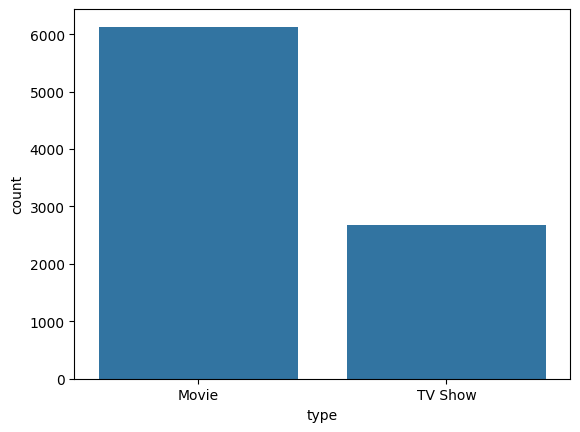

In [12]:
sns.countplot(x="type",data = df) #Looking at number of movies and TV shows

In [13]:
import plotly.graph_objects as go
import plotly.express as px

movie_type_counts = df["type"].value_counts()

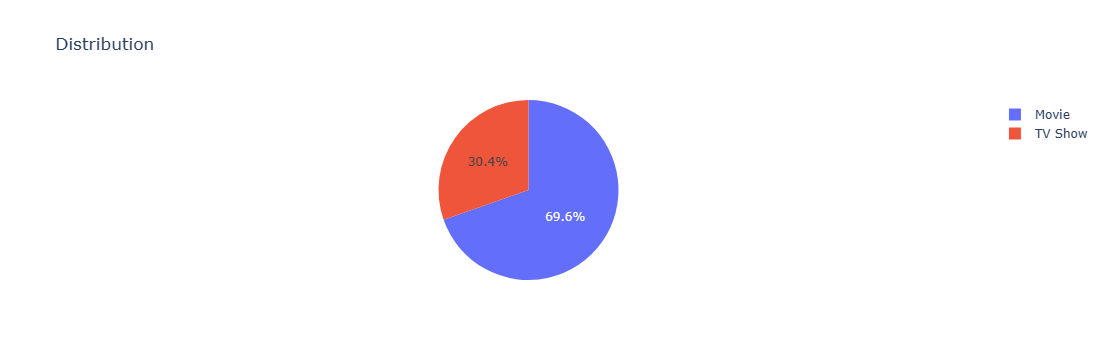

In [14]:
#create the pie chart for movies and shows
fig = go.Figure(data=go.Pie(labels=movie_type_counts.index, values=movie_type_counts.values))
#set the dark background and white color
fig.update_layout(
    title="Distribution", #chart title
)
fig.update_traces()
fig.show()

<Axes: xlabel='rating', ylabel='count'>

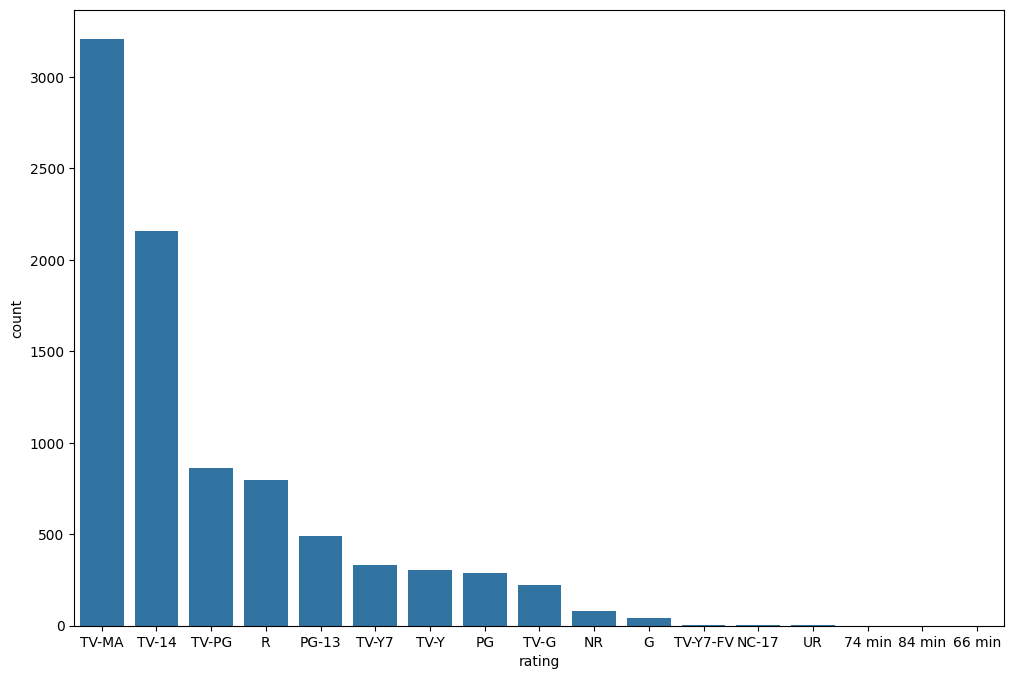

In [15]:
plt.figure(figsize = (12,8))
sns.countplot(x='rating',data = df, order=df["rating"].value_counts().index)

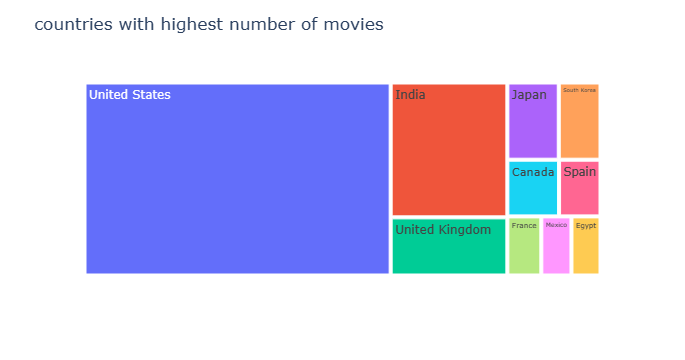

In [16]:
top_countries = df['country'].value_counts().head(10) 
#create the treemap
fig = px.treemap(names=top_countries.index, parents=["" for _ in top_countries.index], values=top_countries.values)
#set the dark background and white font color
fig.update_layout(
    title='countries with highest number of movies', #Chart title
)
fig.show()

In [17]:
df.head(10)

show_id     type                             title  \
0      s1    Movie              Dick Johnson Is Dead   
1      s2  TV Show                     Blood & Water   
2      s3  TV Show                         Ganglands   
3      s4  TV Show             Jailbirds New Orleans   
4      s5  TV Show                      Kota Factory   
5      s6  TV Show                     Midnight Mass   
6      s7    Movie  My Little Pony: A New Generation   
7      s8    Movie                           Sankofa   
8      s9  TV Show     The Great British Baking Show   
9     s10    Movie                      The Starling   

                        director  \
0                Kirsten Johnson   
1                    No Director   
2                Julien Leclercq   
3                    No Director   
4                    No Director   
5                  Mike Flanagan   
6  Robert Cullen, José Luis Ucha   
7                   Haile Gerima   
8                Andy Devonshire   
9                 Theodore Melfi   

                                                cast  \
0                                            No Cast   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   
3                                            No Cast   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...   
5  Kate Siegel, Zach Gilford, Hamish Linklater, H...   
6  Vanessa Hudgens, Kimiko Glenn, James Marsden, ...   
7  Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
8  Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   
9  Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   

                                             country date_added  release_year  \
0                                      United States  25-Sep-21          2020   
1                                       South Africa  24-Sep-21          2021   
2                                      United States  24-Sep-21          2021   
3                                      United States  24-Sep-21          2021   
4                                              India  24-Sep-21          2021   
5                                      United States  24-Sep-21          2021   
6                                      United States  24-Sep-21          2021   
7  United States, Ghana, Burkina Faso, United Kin...  24-Sep-21          1993   
8                                     United Kingdom  24-Sep-21          2021   
9                                      United States  24-Sep-21          2021   

  rating   duration                                          listed_in  \
0  PG-13     90 min                                      Documentaries   
1  TV-MA  2 Seasons    International TV Shows, TV Dramas, TV Mysteries   
2  TV-MA   1 Season  Crime TV Shows, International TV Shows, TV Act...   
3  TV-MA   1 Season                             Docuseries, Reality TV   
4  TV-MA  2 Seasons  International TV Shows, Romantic TV Shows, TV ...   
5  TV-MA   1 Season                 TV Dramas, TV Horror, TV Mysteries   
6     PG     91 min                           Children & Family Movies   
7  TV-MA    125 min   Dramas, Independent Movies, International Movies   
8  TV-14  9 Seasons                       British TV Shows, Reality TV   
9  PG-13    104 min                                   Comedies, Dramas   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...  
5  The arrival of a charismatic young priest brin...  
6  Equestria's divided. But a bright-eyed hero be...  
7  On a photo shoot in Ghana, an American model s...  
8  A talented batch of amateur bakers face off in...  
9  A woman adjusting to life after a loss contend...

In [18]:
old = df.sort_values("release_year", ascending = True) #oldest movies available on netflix
old = old[old['duration'] != ""]
old[['title', "release_year", "country"]][:15]

title  release_year  \
4250                 Pioneers: First Women Filmmakers*          1925   
7790                                    Prelude to War          1942   
8205                              The Battle of Midway          1942   
8660     Undercover: How to Operate Behind Enemy Lines          1943   
8739                Why We Fight: The Battle of Russia          1943   
8763                   WWII: Report from the Aleutians          1943   
8640                                  Tunisian Victory          1944   
8436                                 The Negro Soldier          1944   
8419  The Memphis Belle: A Story of a\nFlying Fortress          1944   
7930                                        San Pietro          1945   
1331               Five Came Back: The Reference Films          1945   
7219                           Know Your Enemy - Japan          1945   
7575                          Nazi Concentration Camps          1945   
7743               Pioneers of African-American Cinema          1946   
7294                                Let There Be Light          1946   

                            country  
4250                  United States  
7790                  United States  
8205                  United States  
8660                  United States  
8739                  United States  
8763                  United States  
8640  United States, United Kingdom  
8436                  United States  
8419                  United States  
7930                  United States  
1331                  United States  
7219                  United States  
7575                  United States  
7743                  United States  
7294                  United States

In [19]:
tag = "Stand-Up Comedy" #standup shows on Netflix
df["relevant"] = df["listed_in"].fillna("").apply(lambda x : 1 if tag.lower() in x.lower() else 0)
com = df[df["relevant"] == 1]
com[com["country"] == "United States"][["title", "country","release_year"]].head(10)

title        country  \
359                        The Original Kings of Comedy  United States   
388             Plastic Cup Boyz: Laughing My Mask Off!  United States   
400   Revelations: The Masters of the Universe: Reve...  United States   
475                                        The Stand-Up  United States   
484                        Lee Su-geun: The Sense Coach  United States   
511                                             Chelsea  United States   
826                                  Bo Burnham: Inside  United States   
1189       Nate Bargatze: The Greatest Average American  United States   
1191                                   The Fluffy Movie  United States   
1249                    Blanche Gardin: The All-Nighter  United States   

      release_year  
359           2000  
388           2021  
400           2021  
475           2019  
484           2021  
511           2017  
826           2021  
1189          2021  
1191          2014  
1249          2021

In [20]:
tag = "Kids' TV" #kids shows on Netflix
df["relevant"] = df["listed_in"].fillna("").apply(lambda x : 1 if tag.lower() in x.lower() else 0)
com = df[df["relevant"] == 1]
com[com["country"] == "India"][["title", "country","release_year"]].head(10)  

title country  release_year
39                                     Chhota Bheem   India          2021
911                                Sab Jholmaal Hai   India          2017
1429             Mighty Little Bheem: Kite Festival   India          2021
2292                                 Little Singham   India          2020
2664  ChuChu TV Nursery Rhymes & Kids Songs (Hindi)   India          2019
2751                                   Akbar Birbal   India          2019
2841        Mighty Little Bheem: Festival of Colors   India          2020
3403                    Mighty Little Bheem: Diwali   India          2019
8121                                    Super Bheem   India          2019
8172          Th Eena Meena Deeka Chase Comedy Show   India          2015

In [21]:
df_countries = pd.DataFrame(df.country.value_counts().reset_index().values, columns=["country", "count"])
df_countries.head()   #count of highest countries who launched movies

country count
0   United States  3649
1           India   972
2  United Kingdom   419
3           Japan   245
4     South Korea   199

In [22]:
date = pd.DataFrame(df.release_year.value_counts().reset_index().values, columns=["Year","Count"])
date.head()   #count of movies launched in a specified year

Year  Count
0  2018   1147
1  2017   1032
2  2019   1030
3  2020    953
4  2016    902

Text(0.5, 1.0, 'Frequency of Movies which were released in different years and are available on Netflix')

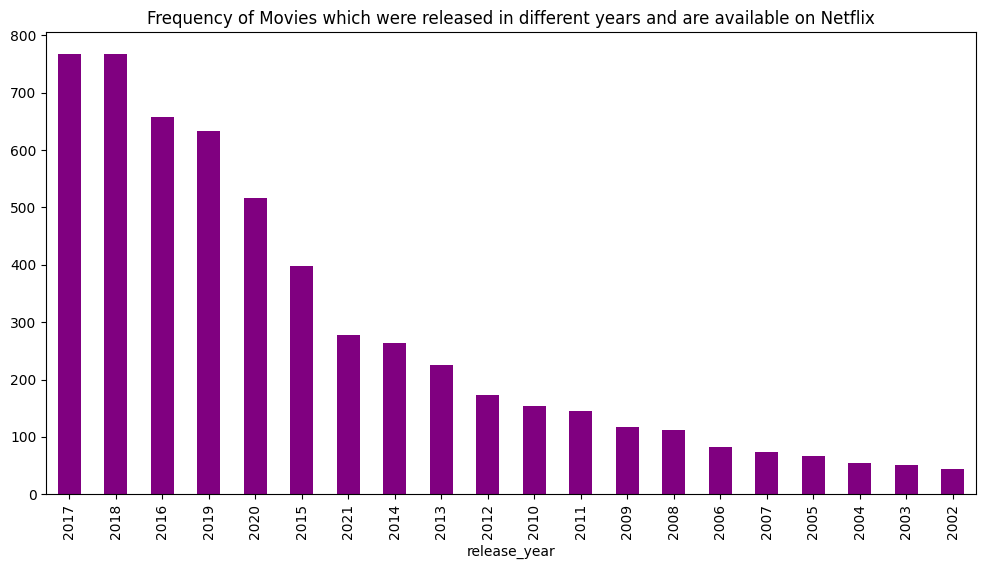

In [23]:
plt.figure(figsize=(12,6))
df[df["type"]=="Movie"]["release_year"].value_counts()[:20].plot(kind="bar" ,color="Purple")
plt.title("Frequency of Movies which were released in different years and are available on Netflix")

Text(0.5, 1.0, 'Frequency of TV Shows which were released in different years and are available on Netflix')

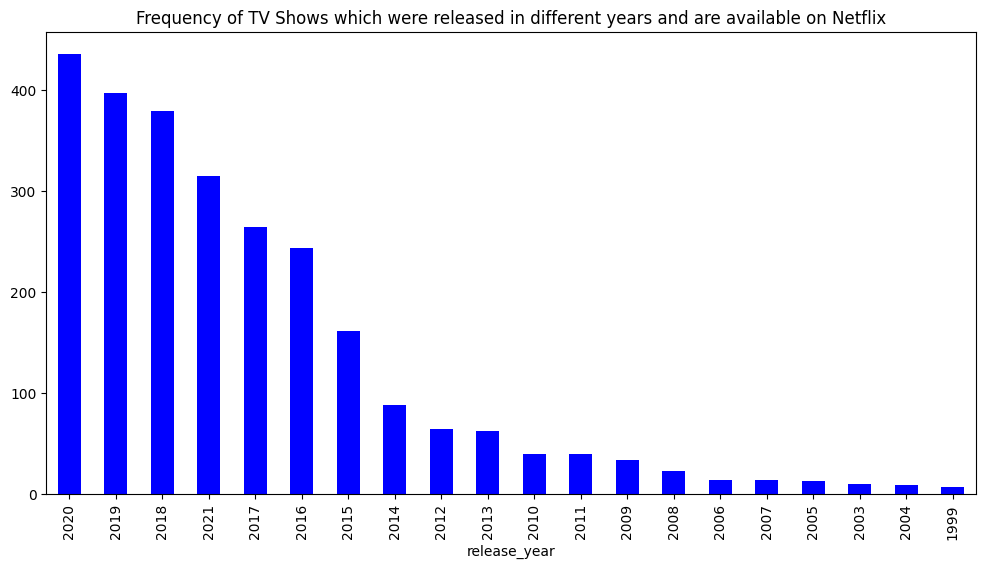

In [24]:
plt.figure(figsize=(12,6))
df[df["type"]=="TV Show"]["release_year"].value_counts()[:20].plot(kind="bar" ,color="Blue")
plt.title("Frequency of TV Shows which were released in different years and are available on Netflix")

Text(0.5, 1.0, 'Top 10 Genres of Movies')

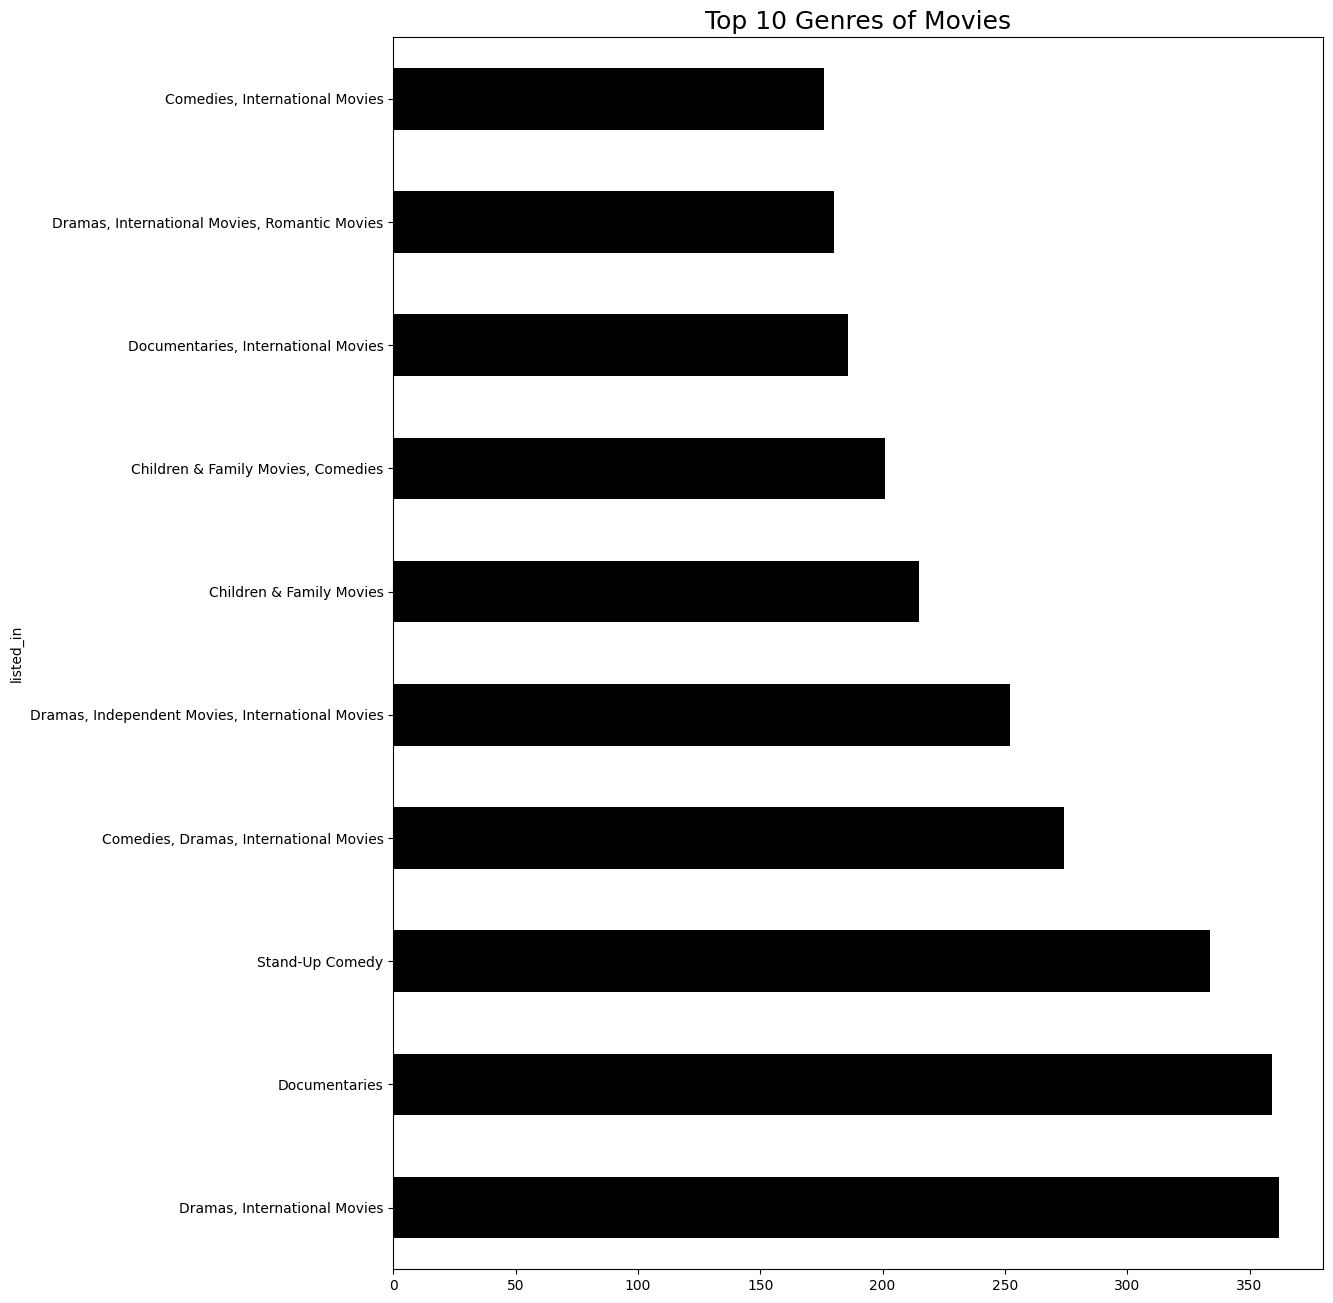

In [25]:
plt.figure(figsize=(12,16))
df[df["type"]=="Movie"]["listed_in"].value_counts()[:10].plot(kind="barh", color="black")
plt.title("Top 10 Genres of Movies",size=18)

Text(0.5, 1.0, 'Top 10 Genres of TV shows')

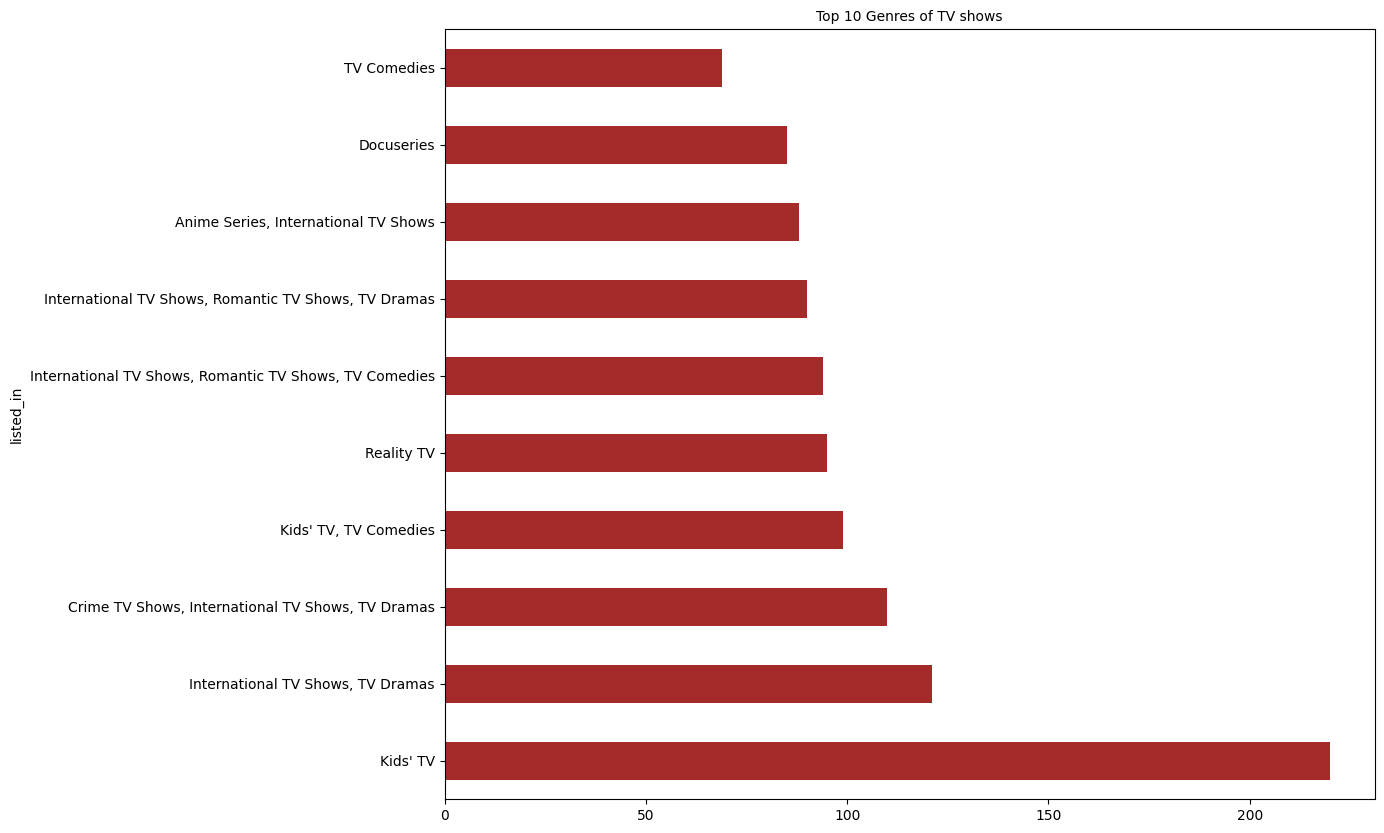

In [26]:
plt.figure(figsize=(12,10))
df[df["type"]=="TV Show"]["listed_in"].value_counts()[:10].plot(kind="barh", color="Brown")
plt.title("Top 10 Genres of TV shows",size=10)

In [27]:
netflix =df.copy()

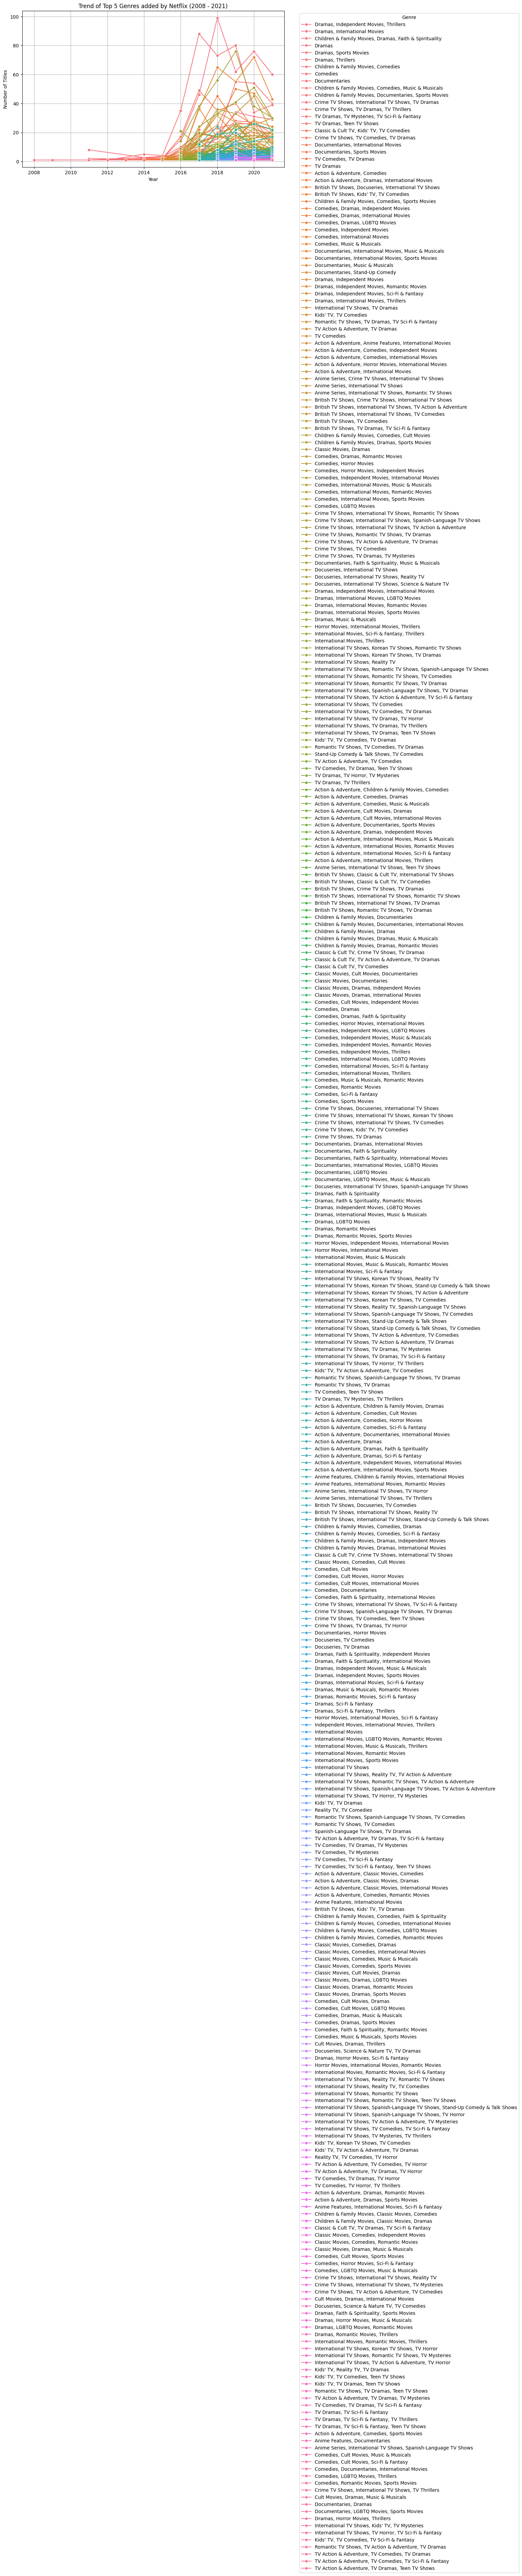

In [38]:
genres = netflix['listed_in'].str.split(', ').explode()
genre_counts = genres.value_counts()
top_5_genres = genre_counts.head(5)
netflix_top_5 = netflix[netflix['listed_in'].str.contains('|'.join(top_5_genres.index))]
netflix_top_5['date_added'] = pd.to_datetime(netflix_top_5['date_added'])
counts_by_year_genre = netflix_top_5.groupby([netflix_top_5['date_added'].dt.year, 'listed_in']).size().reset_index(name='count')
plt.figure(figsize=(10, 6))
sns.lineplot(data=counts_by_year_genre, x='date_added', y='count', hue='listed_in', marker='o')
plt.title('Trend of Top 5 Genres added by Netflix (2008 - 2021)')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [39]:
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water      No Director   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans      No Director   
4      s5  TV Show           Kota Factory      No Director   

                                                cast        country  \
0                                            No Cast  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  United States   
3                                            No Cast  United States   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0  25-Sep-21          2020  PG-13     90 min   
1  24-Sep-21          2021  TV-MA  2 Seasons   
2  24-Sep-21          2021  TV-MA   1 Season   
3  24-Sep-21          2021  TV-MA   1 Season   
4  24-Sep-21          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  relevant  
0  As her father nears the end of his life, filmm...         0  
1  After crossing paths at a party, a Cape Town t...         0  
2  To protect his family from a powerful drug lor...         0  
3  Feuds, flirtations and toilet talk go down amo...         0  
4  In a city of coaching centers known to train I...         0

In [30]:
df.director.value_counts()

director
No Director                       2634
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: count, Length: 4529, dtype: int64

In [31]:
newdata = df.groupby('rating').size().rename_axis('Rating').reset_index(name='Count')
nd = newdata.sort_values(by = 'Count', ascending=True)
nd = nd.tail(5)
nd

Rating  Count
7   PG-13    490
8       R    799
12  TV-PG    863
9   TV-14   2160
11  TV-MA   3207

In [32]:
fil_directors = df['director'].str.split(',' ,expand=True).stack()
fil_directors= pd.DataFrame(fil_directors)
fil_directors.columns = ['director']
directors = fil_directors.groupby(['director']).size().reset_index(name='counts')
directors = directors.sort_values(by='counts',ascending=False)
directors = directors[directors['director'] != 'No Director']
directors = directors.head(5)
directors

director  counts
4021  Rajiv Chilaka      22
4068    Raúl Campos      18
261       Jan Suter      18
4652    Suhas Kadav      16
3235   Marcus Raboy      16

In [33]:
fil_actors = df['cast'].str.split(',' ,expand=True).stack()
fil_actors = pd.DataFrame(fil_actors)
fil_actors .columns = ['cast']
actors = fil_actors.groupby(['cast']).size().reset_index(name='counts')
actors = actors.sort_values(by='counts',ascending=False)
actors = actors[actors['cast'] != 'No Cast']
actors = actors.head(5)
actors

cast  counts
2612         Anupam Kher      39
26941       Rupa Bhimani      31
30303   Takahiro Sakurai      30
15541      Julie Tejwani      28
23624            Om Puri      27

In [34]:
dff = df[['type','release_year']]
dff = dff.rename(columns = {'release_year' : 'Release Year'})
dff2 = dff.groupby(['Release Year' , 'type']).size().reset_index(name='Total Content')
dff2 = dff2[dff2['Release Year']>=2011]
dff2

Release Year     type  Total Content
97           2011    Movie            145
98           2011  TV Show             40
99           2012    Movie            173
100          2012  TV Show             64
101          2013    Movie            225
102          2013  TV Show             63
103          2014    Movie            264
104          2014  TV Show             88
105          2015    Movie            398
106          2015  TV Show            162
107          2016    Movie            658
108          2016  TV Show            244
109          2017    Movie            767
110          2017  TV Show            265
111          2018    Movie            767
112          2018  TV Show            380
113          2019    Movie            633
114          2019  TV Show            397
115          2020    Movie            517
116          2020  TV Show            436
117          2021    Movie            277
118          2021  TV Show            315

In [35]:
dff4 = dff2[dff2['type']=='TV Show']
dff4

Release Year     type  Total Content
98           2011  TV Show             40
100          2012  TV Show             64
102          2013  TV Show             63
104          2014  TV Show             88
106          2015  TV Show            162
108          2016  TV Show            244
110          2017  TV Show            265
112          2018  TV Show            380
114          2019  TV Show            397
116          2020  TV Show            436
118          2021  TV Show            315

In [36]:
features=['title','duration','type']
seasons= df[features]
seasons['no_of_seasons']=seasons['duration'].str.replace(' Season','')
seasons['no_of_seasons']=seasons['no_of_seasons'].str.replace('s','')
seasons = seasons[seasons['type']=='TV Show']
seasons['no_of_seasons']=seasons['no_of_seasons'].astype(str).astype(int)
seasons = seasons.drop('duration', axis= 1)
seasons = seasons.sort_values('no_of_seasons', ascending=False)
seasons = seasons.head(5)
seasons

title     type  no_of_seasons
548           Grey's Anatomy  TV Show             17
2423            Supernatural  TV Show             15
4798                    NCIS  TV Show             15
1354               Heartland  TV Show             13
4220  COMEDIANS of the world  TV Show             13

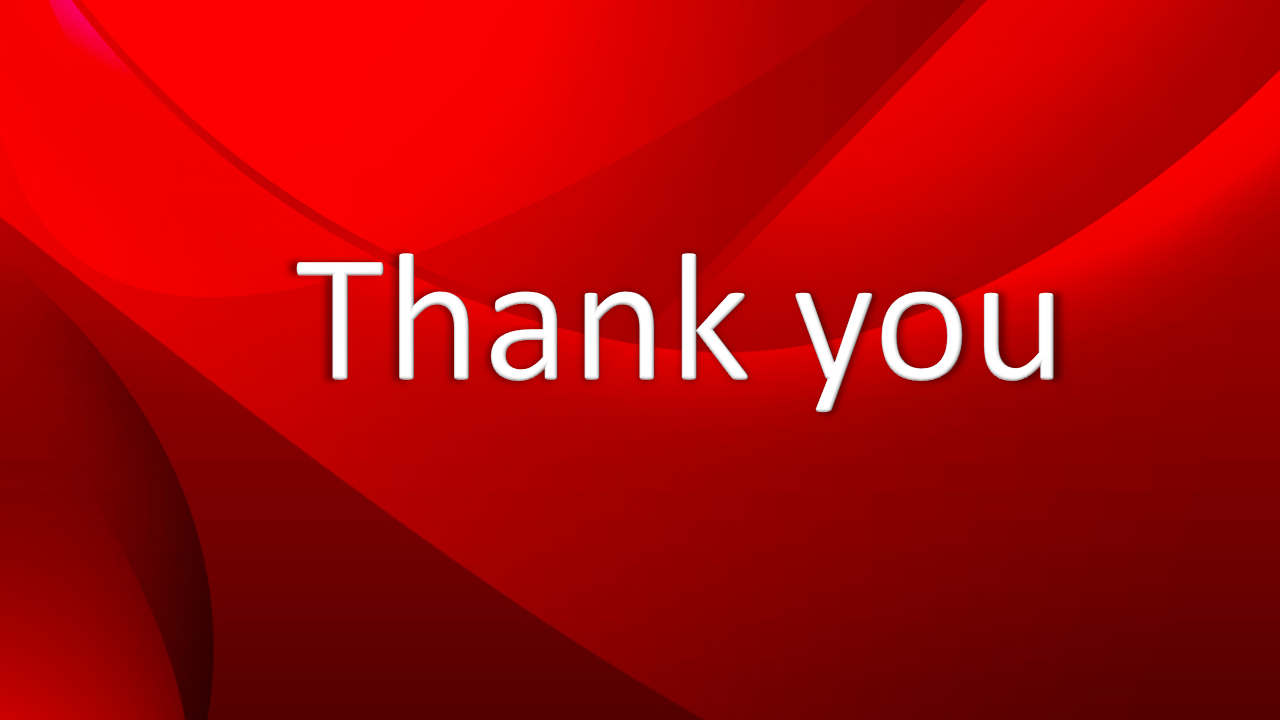    